In [2]:
# Importing useful libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # statistical graphics
from PIL import Image # imaging library
import csv

In [4]:
# Creating the csv file of the dataset
plants_dataset = r'C:\Users\hp\Downloads\PlantVillage'
plants_csv = "PlantVillage.csv"

with open(plants_csv, 'w', newline = '') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["image_path", "class"])
    
    for disease_folder in os.listdir(plants_dataset):
        disease_path = os.path.join(plants_dataset, disease_folder)
        if os.path.isdir(disease_path):
            for image_file in os.listdir(disease_path):
                image_path = os.path.join(disease_folder, image_file)
                csv_writer.writerow([image_path, disease_folder])
                
print("CSV file created!")

CSV file created!


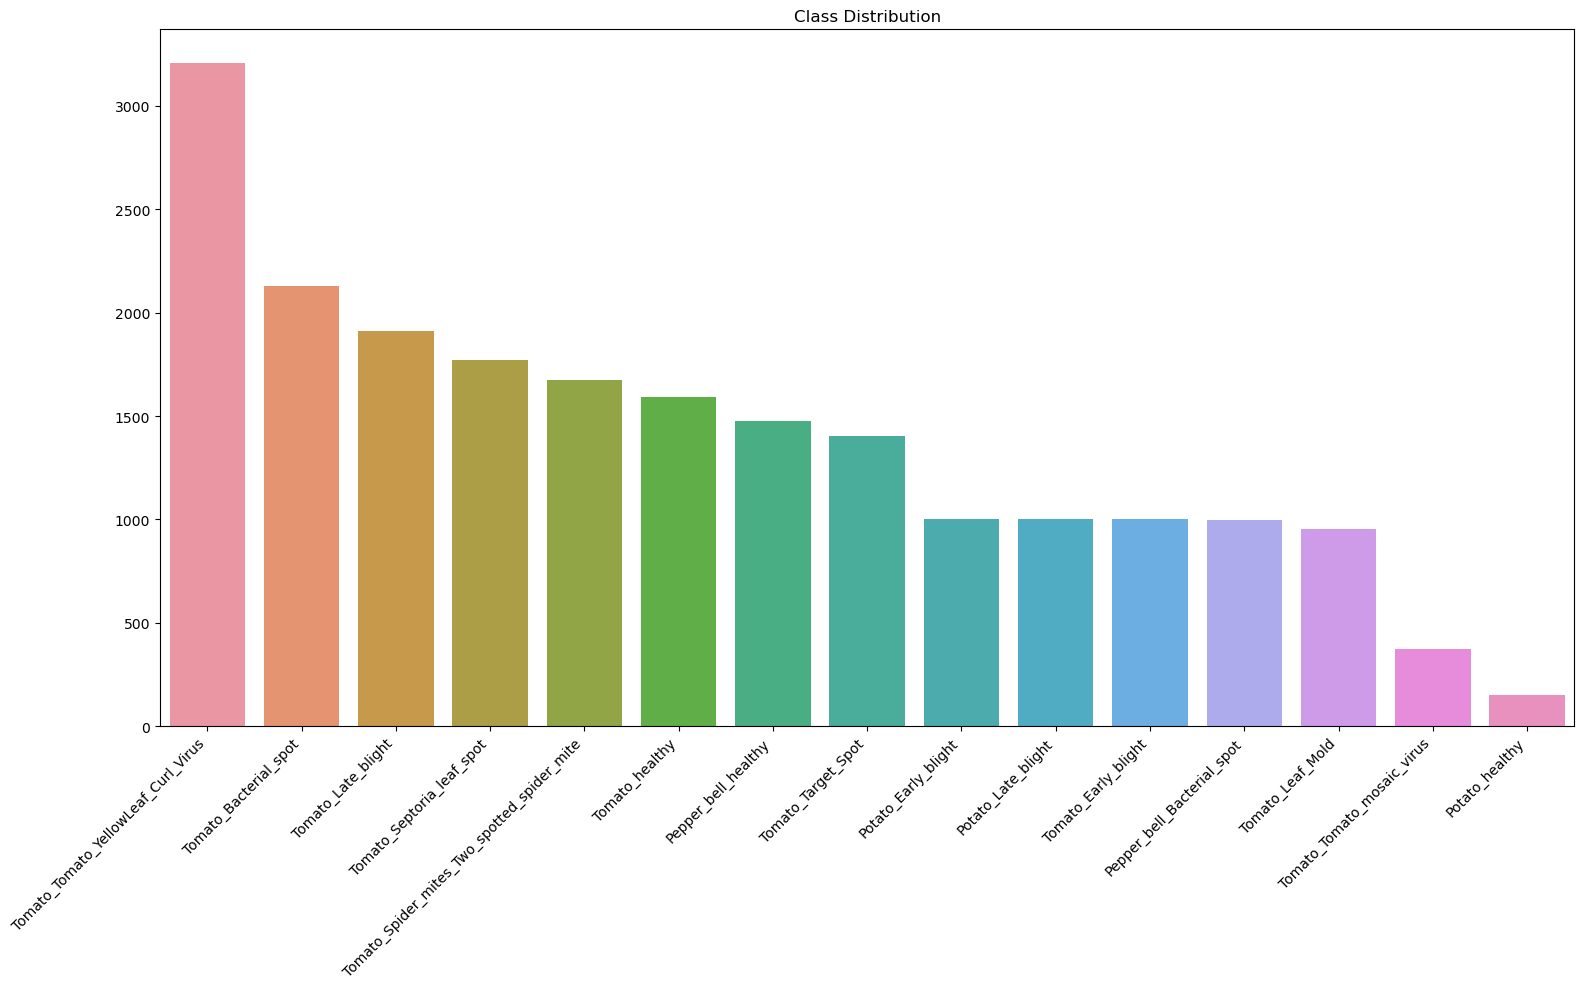

In [5]:
# Loading the csv file and visualizing class distribution
plants_data = pd.read_csv(plants_csv)

class_count = plants_data['class'].value_counts()

plt.figure(figsize = (16, 10))
sns.barplot(x = class_count.index, y = class_count.values)
plt.title('Class Distribution')
plt.xticks(rotation = 45)
plt.gca().set_xticklabels(class_count.index, rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()


In [ ]:
# Data Processing
def image_processing(image_path, image_dimension):
    image = Image.open(image_path).resize(image_dimension)
    image = image.convert('RGB')
    image = np.array(image) / 255.0
    return image

image_dimension = (256, 256)

# Processing the dataset in batches since we are dealing with a very large dataset
batch_size = 50
batched_images = []
batched_labels = []

# Iterating through the images in the dataset
for batch_start in range(0, len(plants_data), batch_size):
    batch_end = batch_start + batch_size
    batched_data = plants_data.iloc[batch_start : batch_end]
    batch_images = []
    batch_labels = []
    
    # Iterating through the batch data, creating the images' full path, and processing the batched images
    for image_path, label in zip(batched_data['image_path'], batched_data['class']):
        full_image_path = os.path.join(plants_dataset, image_path)
        processed_image = image_processing(full_image_path, image_dimension)
        batched_images.append(processed_image)
        batched_labels.append(label)
    batched_images.append(np.array(batch_images))
    batched_labels.append(np.array(batch_labels))

# Inputs for the machine learning model
model_input = np.concatenate(batched_images, axis = 0)
target_label = np.concatenate(batched_labels, axis = 0)